<a href="https://colab.research.google.com/github/Cryslender/OIBSIP/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Packages

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Data Loading

In [ ]:
twitter_data = pd.read_csv("Twitter_Data.csv")
twitter_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


# Data Cleaning

In [ ]:
# check the shape of the data
twitter_data.shape

(162980, 2)

In [ ]:
# checking the null in the dataset
twitter_data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
# Handle missing values by removing rows with missing values
twitter_data.dropna(inplace=True)

In [ ]:
# check if the null values are removed
twitter_data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
# check the info about the dataset
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
#check the duplicates in the dataset
twitter_data.duplicated().sum()

0

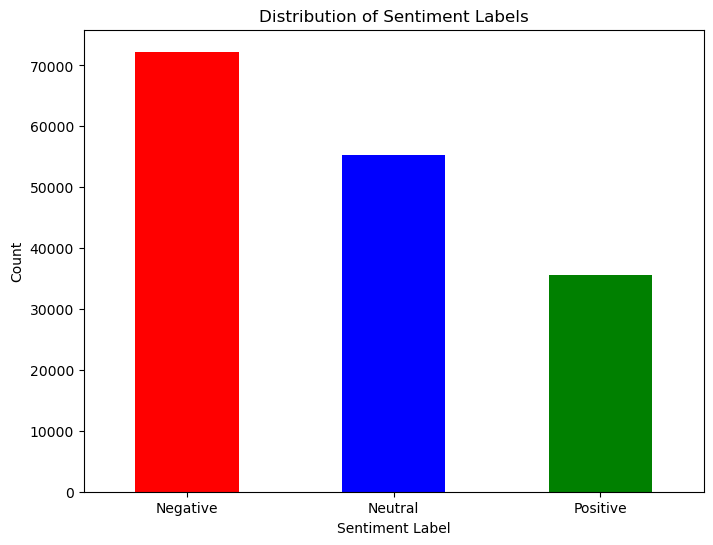

In [ ]:
# Visualize the 'category' column
plt.figure(figsize=(8, 6))
twitter_data['category'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()

# Explorative Data Analytics

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
#initialize profile variable to use it to find the analytics about the data
profile= ProfileReport(twitter_data,title="Twitter Data Profiling Report", explorative=True)

#Output the report about the data
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-processing

In [ ]:
# Clean the text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    clean_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    clean_text = [lemmatizer.lemmatize(word) for word in clean_tokens]
    # Join tokens back into a single string
    return ' '.join(clean_text)

In [ ]:
twitter_data['clean_text'] = twitter_data['clean_text'].apply(clean_text)

In [ ]:
twitter_data

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0
...,...,...
162975,crore paid neerav modi recovered congress lead...,-1.0
162976,dear r terrorist payal gawar modi killing plus...,-1.0
162977,cover interaction forum left,0.0
162978,big project came india modi dream project happ...,0.0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(twitter_data['clean_text'], twitter_data['category'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Design (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Implementing SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluating SVM, Naive Bayes, and CNN models
svm_accuracy = svm_model.score(X_test_tfidf, y_test)

In [ ]:
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8946125053690863


# Model Evaluation (SVC)

In [ ]:
# Predict sentiment on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

In [ ]:
# Create a confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

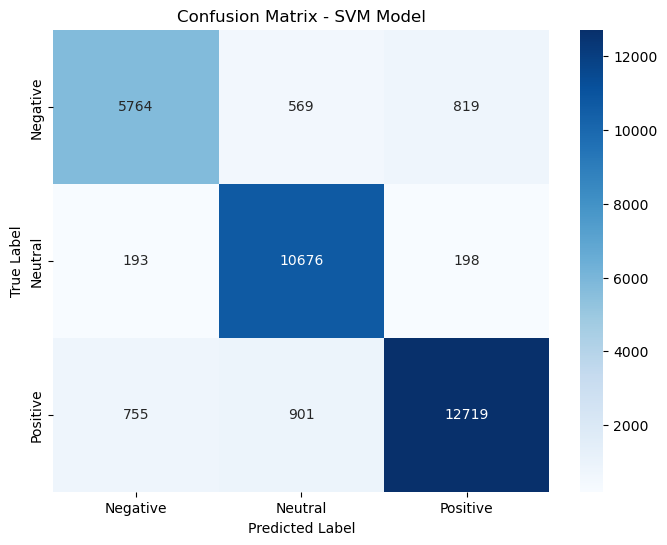

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Design (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Implementing Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
nb_accuracy = nb_model.score(X_test_tfidf, y_test)

In [ ]:
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.578327299502976


# Model Evaluation (Naive Bayes)

In [ ]:
# Predict sentiment on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

In [ ]:
# Create a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

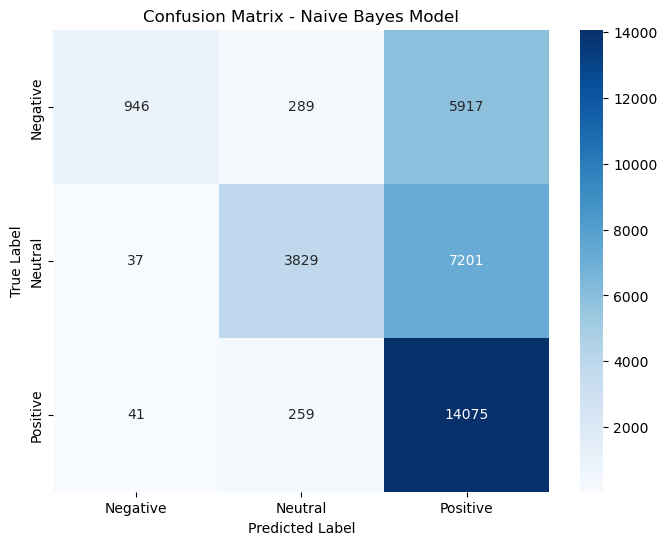

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title('Confusion Matrix - Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()